In [3]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

In [5]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

In [7]:
 roc_curve = RocCurveDisplay.from_estimator # shorthand

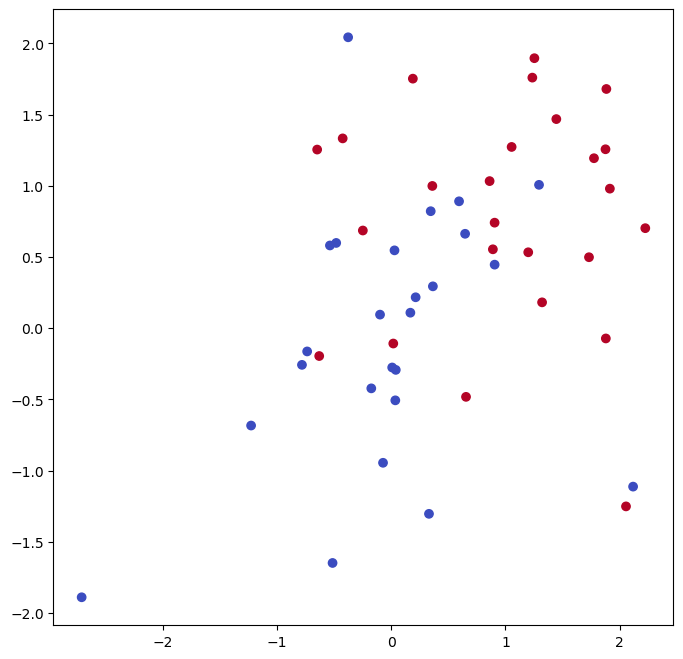

In [9]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1]*25+[1]*25)
X[y==1] += 1
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
X[:,1],
c=y,
cmap=cm.coolwarm);

In [11]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

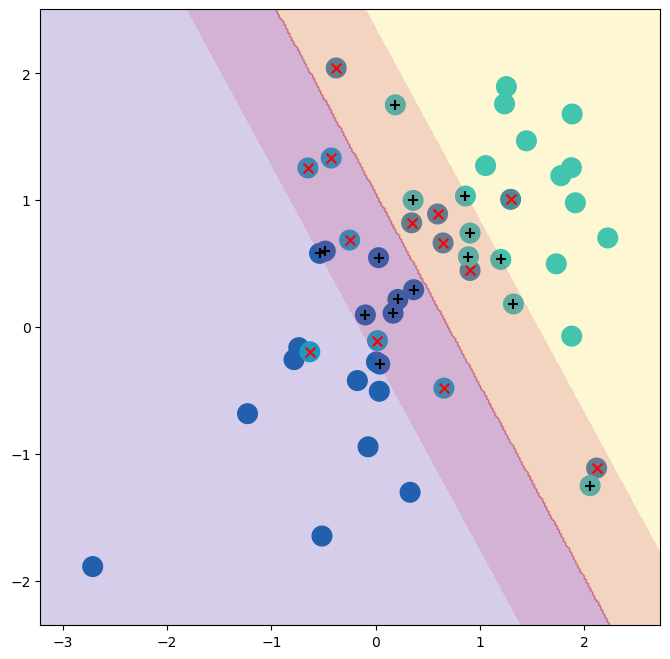

In [13]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_linear,
ax=ax)

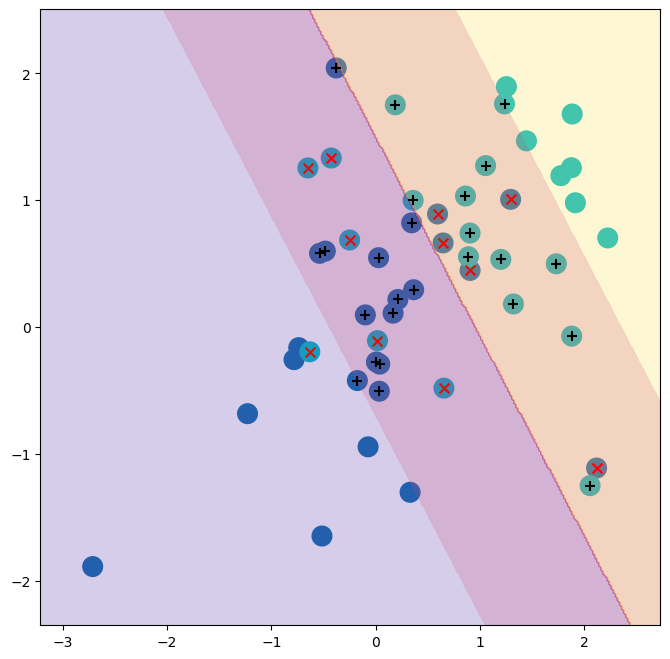

In [15]:
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_linear_small,
ax=ax)

In [17]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [19]:
kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_linear,
{'C':[0.001,0.01,0.1,1,5,10,100]},
refit=True,
cv=kfold,
scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 1}

In [21]:
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [25]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1]*10+[1]*10)
X_test[y_test==1] += 1

In [27]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,10,2
1,0,8


In [29]:
svm_ = SVC(C=0.001,
kernel='linear').fit(X, y)
y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,4,0
1,6,10


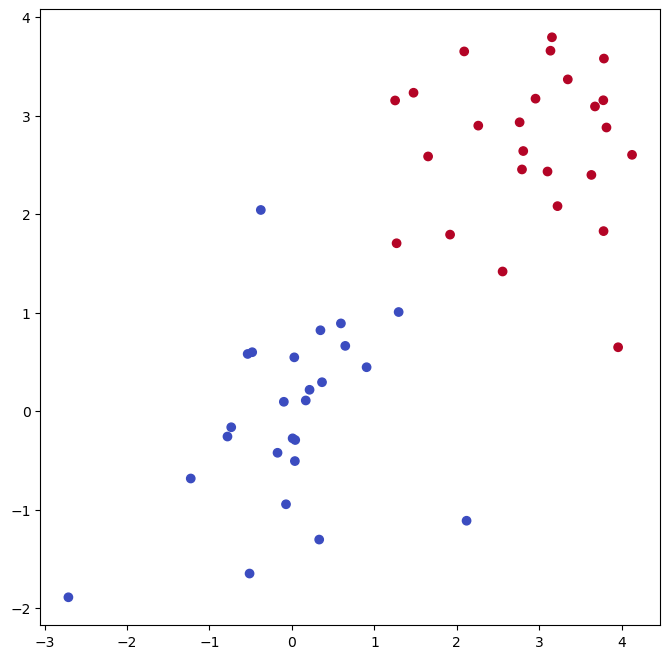

In [31]:
X[y==1] += 1.9;
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

In [33]:
svm_ = SVC(C=1e5, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


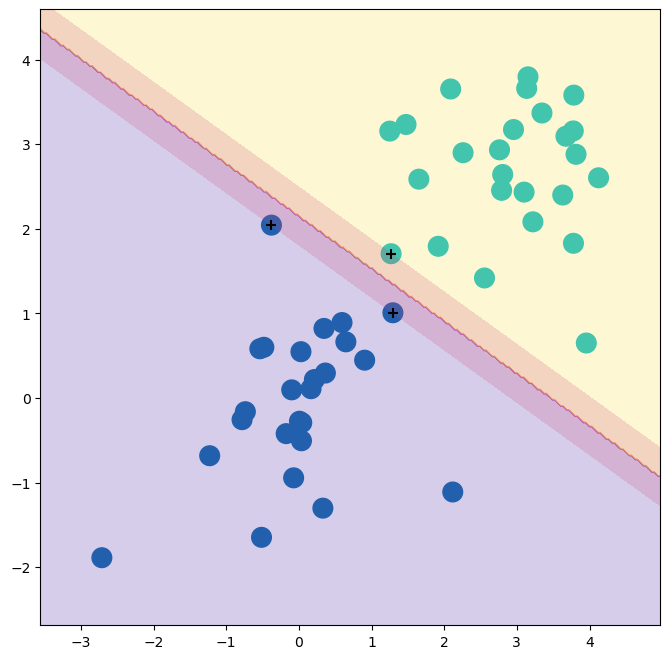

In [35]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_,
ax=ax)


In [37]:
svm_ = SVC(C=0.1, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


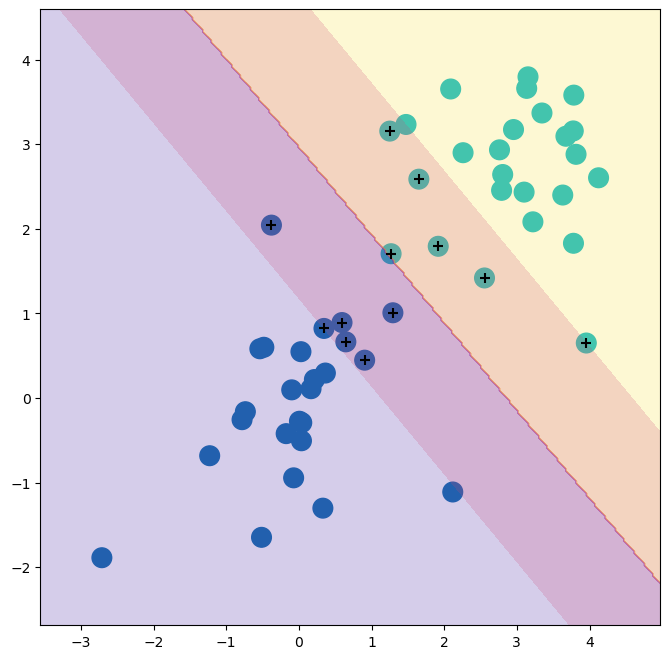

In [39]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_,
ax=ax)

In [41]:
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

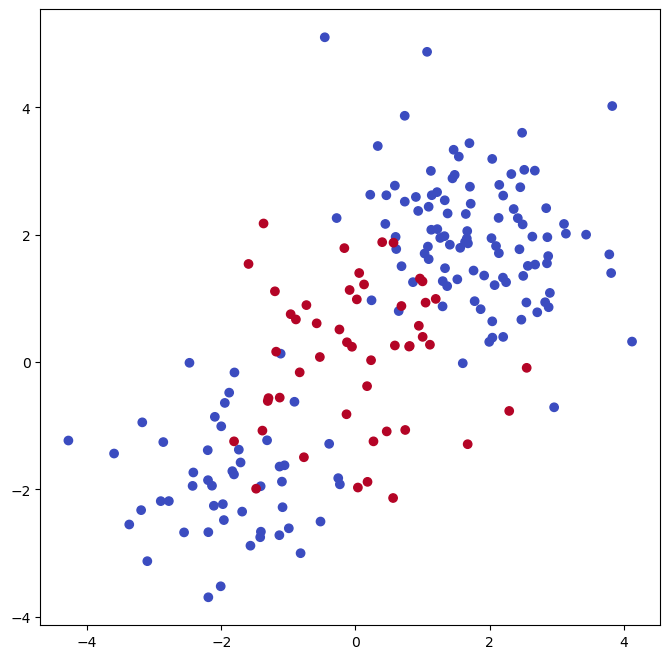

In [43]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
X[:,1],
c=y,
cmap=cm.coolwarm)

In [45]:
(X_train,
X_test,
y_train,
y_test) = skm.train_test_split(X,
y,
test_size=0.5,
random_state=0)
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=1)

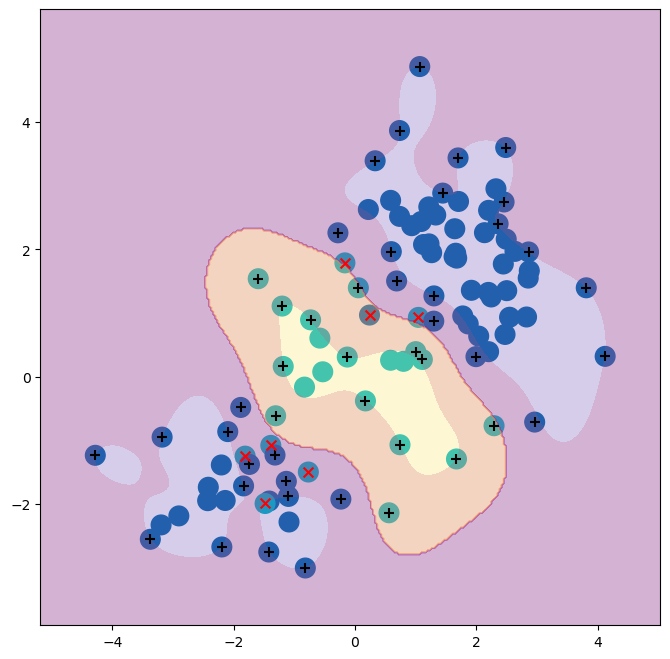

In [47]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
y_train,
svm_rbf,
ax=ax)

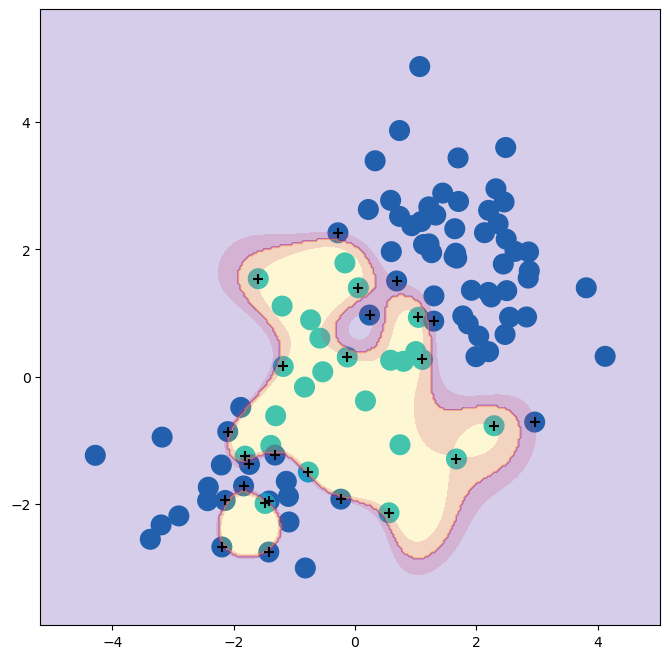

In [49]:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1e5)
svm_rbf.fit(X_train, y_train)
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
y_train,
svm_rbf,
ax=ax)

In [51]:
kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_rbf,
{'C':[0.1,1,10,100,1000],
'gamma':[0.5,1,2,3,4]},
refit=True,
cv=kfold,
scoring='accuracy');
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.5}

Truth,1,2
Predicted,,
1,71,8
2,4,17


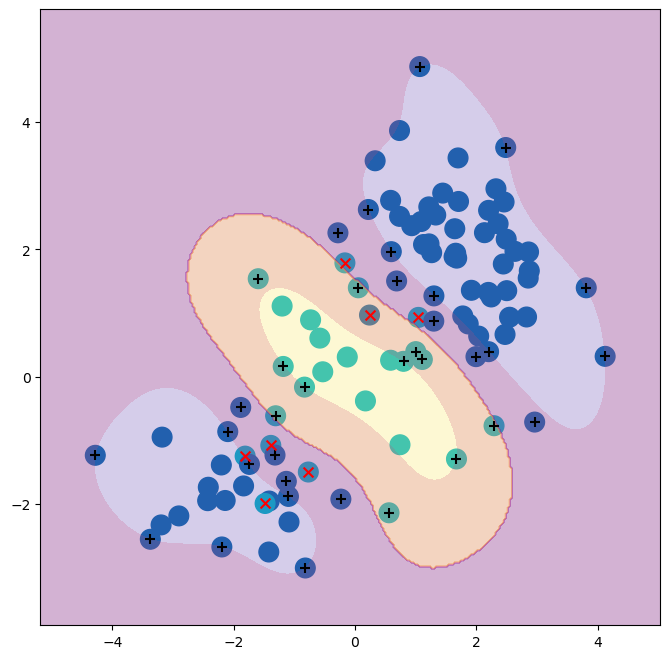

In [53]:
best_svm = grid.best_estimator_
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
y_train,
best_svm,
ax=ax)
y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test, y_test)

### ROC Curves

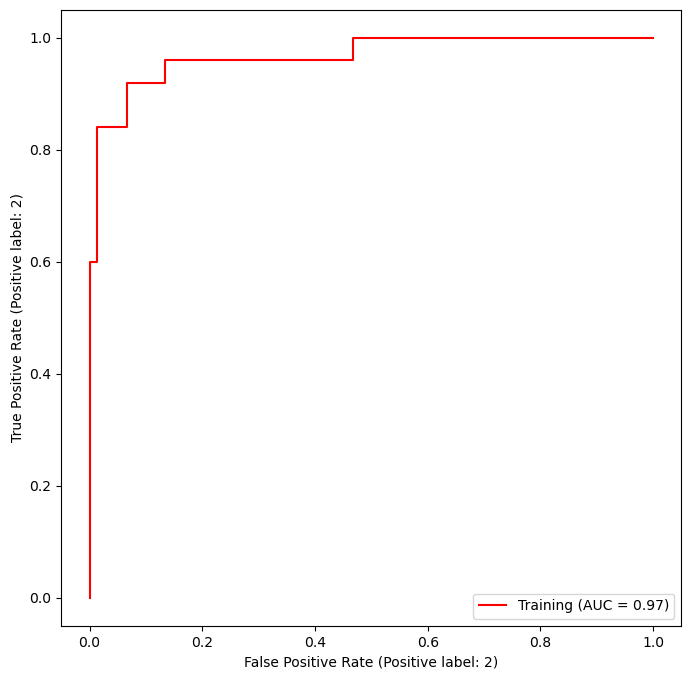

In [56]:
fig, ax = subplots(figsize=(8,8))
roc_curve(best_svm,
X_train,
y_train,
name='Training',
color='r',
ax=ax);

<>:8: SyntaxWarning: invalid escape sequence '\g'
<>:8: SyntaxWarning: invalid escape sequence '\g'
C:\Users\joseph.tuyambaze\AppData\Local\Temp\ipykernel_3400\2664456755.py:8: SyntaxWarning: invalid escape sequence '\g'
  name='Training $\gamma=50$',


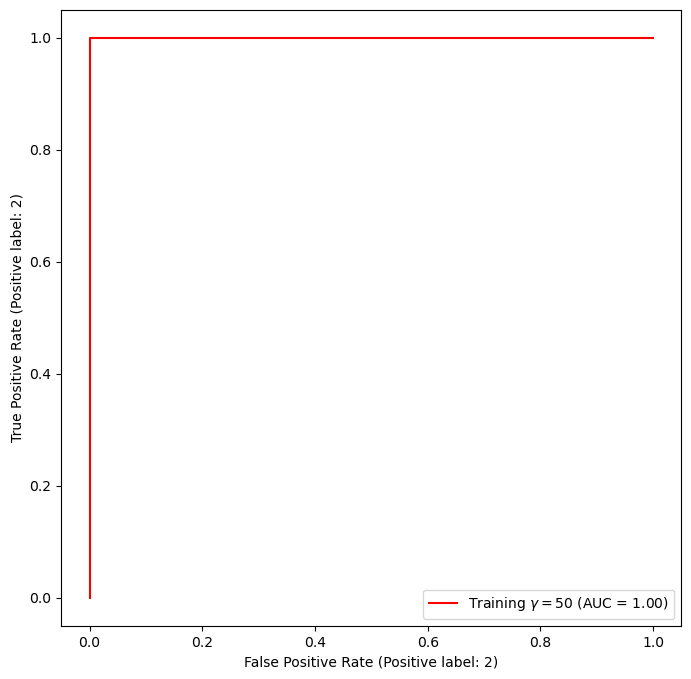

In [58]:
svm_flex = SVC(kernel="rbf",
gamma=50,C=1)
svm_flex.fit(X_train, y_train)
fig, ax = subplots(figsize=(8,8))
roc_curve(svm_flex,
X_train,
y_train,
name='Training $\gamma=50$',
color='r',
ax=ax);
                

In [60]:
roc_curve(svm_flex,
X_test,
y_test,
name='Test $\gamma=50$',
color='b',
ax=ax)
fig;

<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:4: SyntaxWarning: invalid escape sequence '\g'
C:\Users\joseph.tuyambaze\AppData\Local\Temp\ipykernel_3400\632665930.py:4: SyntaxWarning: invalid escape sequence '\g'
  name='Test $\gamma=50$',


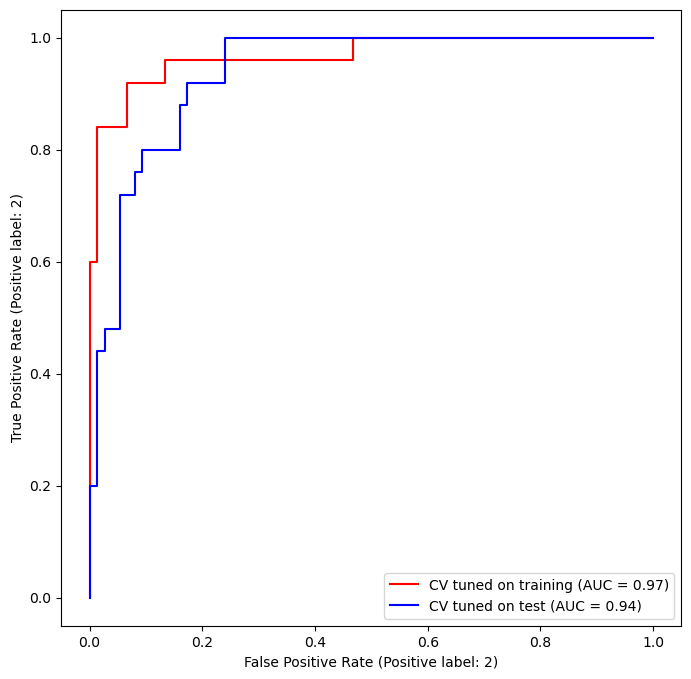

In [64]:
fig, ax = subplots(figsize=(8,8))
for (X_, y_, c, name) in zip(
    (X_train, X_test),
    (y_train, y_test),
    ('r', 'b'),
    ('CV tuned on training',
    'CV tuned on test')):
    roc_curve(best_svm,
        X_,
        y_,
        name=name,
        ax=ax,
    color=c)

### SVM with Multiple Classes

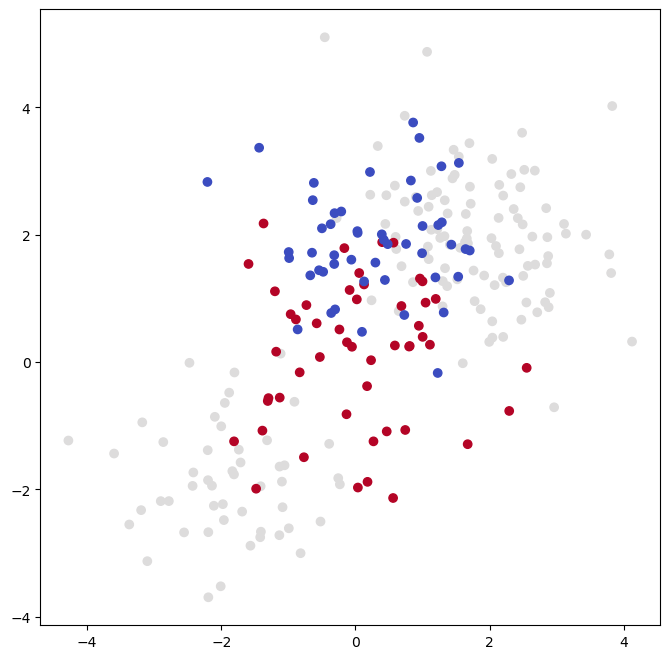

In [67]:
rng = np.random.default_rng(123)
X = np.vstack([X, rng.standard_normal((50, 2))])
y = np.hstack([y, [0]*50])
X[y==0,1] += 2
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

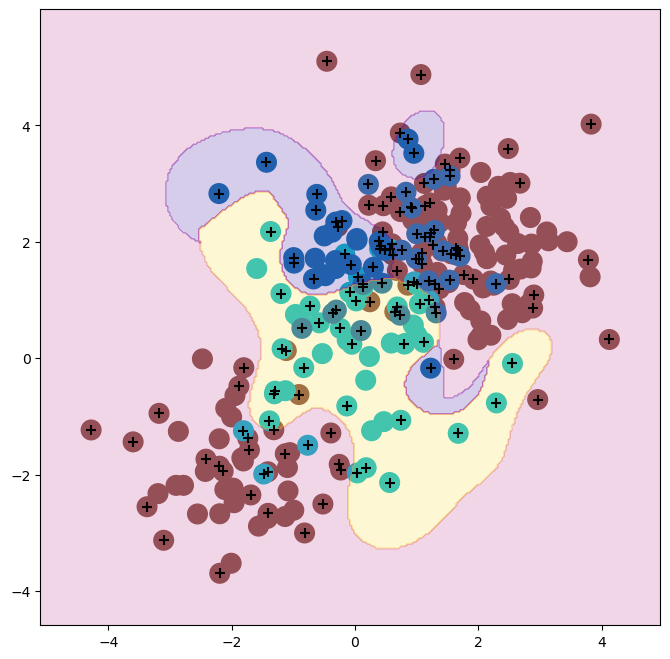

In [69]:
svm_rbf_3 = SVC(kernel="rbf",
C=10,
gamma=1,
decision_function_shape='ovo');
svm_rbf_3.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_rbf_3,
scatter_cmap=cm.tab10,
ax=ax)

### Application to Gene Expression Data

In [72]:
Khan = load_data('Khan')
Khan['xtrain'].shape, Khan['xtest'].shape

((63, 2308), (20, 2308))

In [74]:
khan_linear = SVC(kernel='linear', C=10)
khan_linear.fit(Khan['xtrain'], Khan['ytrain'])
confusion_table(khan_linear.predict(Khan['xtrain']),
Khan['ytrain'])

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [76]:
confusion_table(khan_linear.predict(Khan['xtest']),
Khan['ytest'])

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5
